In [1]:
import csv
import sqlite3
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.DataFrame([ row for row in csv.DictReader(open('Resources/Global Ecological Footprint 2023.csv',errors='ignore')) ])
df.head()

,Country,Region,SDGi,Life Exectancy,HDI,Per Capita GDP,Income Group,Population (millions),Cropland Footprint,Grazing Footprint,...,Built up land,Total Ecological Footprint (Consumption),Cropland,Grazing land,Forest land,Fishing ground,Total biocapacity,Ecological (Deficit) or Reserve,Number of Earths required,Number of Countries required
0,Afghanistan,Middle East/Central Asia,52.5,62,0.48,,LI,40.8,0.4,0.1,...,0.028232273,0.8,0.3,0.1,0.012981282,0.000565167,0.513827024,-0.287637599,0.530695582,1.559794611
1,Albania,Other Europe,71.6,76,0.8,"$14,889",UM,2.9,0.8,0.2,...,0.073005587,2.1,0.6,0.2,0.223326157,0.081391904,1.176752316,-0.894486045,1.37148542,1.760131111
2,Algeria,Africa,71.5,76,0.75,"$11,137",UM,45.4,0.7,0.2,...,0.037775208,2.2,0.4,0.2,0.023911707,0.007179154,0.663374969,-1.559593496,1.471954604,3.350998407
3,Angola,Africa,50.9,62,0.59,"$6,304",LM,35,0.2,0.1,...,0.061359798,0.9,0.2,0.8,0.416887822,0.153498781,1.588191242,0.730345635,0.568028656,0.540139993
4,Antigua and Barbuda,Central America/Caribbean,,78,0.79,"$18,749",HI,0.1,,,...,,2.9,,,,,0.917277482,-2.01945766,1.944580357,3.201577712


In [3]:
df.to_csv('Resources/clean_data.csv')

In [4]:
df = pd.read_csv('Resources/clean_data.csv', index_col='Unnamed: 0')
df[:5]

,Country,Region,SDGi,Life Exectancy,HDI,Per Capita GDP,Income Group,Population (millions),Cropland Footprint,Grazing Footprint,...,Built up land,Total Ecological Footprint (Consumption),Cropland,Grazing land,Forest land,Fishing ground,Total biocapacity,Ecological (Deficit) or Reserve,Number of Earths required,Number of Countries required
0,Afghanistan,Middle East/Central Asia,52.5,62,0.48,NaN,LI,40.8,0.4,0.1,...,0.028232,0.8,0.3,0.1,0.012981,0.000565,0.513827,-0.287638,0.530696,1.559795
1,Albania,Other Europe,71.6,76,0.8,"$14,889",UM,2.9,0.8,0.2,...,0.073006,2.1,0.6,0.2,0.223326,0.081392,1.176752,-0.894486,1.371485,1.760131
2,Algeria,Africa,71.5,76,0.75,"$11,137",UM,45.4,0.7,0.2,...,0.037775,2.2,0.4,0.2,0.023912,0.007179,0.663375,-1.559593,1.471955,3.350998
3,Angola,Africa,50.9,62,0.59,"$6,304",LM,35,0.2,0.1,...,0.061360,0.9,0.2,0.8,0.416888,0.153499,1.588191,0.730346,0.568029,0.540140
4,Antigua and Barbuda,Central America/Caribbean,NaN,78,0.79,"$18,749",HI,0.1,NaN,NaN,...,NaN,2.9,NaN,NaN,NaN,NaN,0.917277,-2.019458,1.944580,3.201578


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 0 to 181
Data columns (total 23 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Country                                   182 non-null    object 
 1   Region                                    182 non-null    object 
 2   SDGi                                      159 non-null    object 
 3   Life Exectancy                            176 non-null    object 
 4   HDI                                       173 non-null    object 
 5   Per Capita GDP                            165 non-null    object 
 6   Income Group                              178 non-null    object 
 7   Population (millions)                     182 non-null    object 
 8   Cropland Footprint                        152 non-null    float64
 9   Grazing Footprint                         152 non-null    float64
 10  Forest Product Footprint                  1

In [6]:
df = df.dropna()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134 entries, 1 to 179
Data columns (total 23 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Country                                   134 non-null    object 
 1   Region                                    134 non-null    object 
 2   SDGi                                      134 non-null    object 
 3   Life Exectancy                            134 non-null    object 
 4   HDI                                       134 non-null    object 
 5   Per Capita GDP                            134 non-null    object 
 6   Income Group                              134 non-null    object 
 7   Population (millions)                     134 non-null    object 
 8   Cropland Footprint                        134 non-null    float64
 9   Grazing Footprint                         134 non-null    float64
 10  Forest Product Footprint                  1

In [8]:
# removing ($ and comma) from Per Capita GDP column
df['Per Capita GDP'] = df['Per Capita GDP'].str.replace('$','').str.replace(',','')

# reviewed column for values that could not turn into float and collected row indexes
nan = [40,42]

# removed rows with issues
df = df.drop(nan)

# changed column type from object to float
df["Per Capita GDP"] = df["Per Capita GDP"].astype('float')

df[:5]

,Country,Region,SDGi,Life Exectancy,HDI,Per Capita GDP,Income Group,Population (millions),Cropland Footprint,Grazing Footprint,...,Built up land,Total Ecological Footprint (Consumption),Cropland,Grazing land,Forest land,Fishing ground,Total biocapacity,Ecological (Deficit) or Reserve,Number of Earths required,Number of Countries required
1,Albania,Other Europe,71.6,76,0.8,14889.0,UM,2.9,0.8,0.2,...,0.073006,2.1,0.6,0.2,0.223326,0.081392,1.176752,-0.894486,1.371485,1.760131
2,Algeria,Africa,71.5,76,0.75,11137.0,UM,45.4,0.7,0.2,...,0.037775,2.2,0.4,0.2,0.023912,0.007179,0.663375,-1.559593,1.471955,3.350998
3,Angola,Africa,50.9,62,0.59,6304.0,LM,35,0.2,0.1,...,0.061360,0.9,0.2,0.8,0.416888,0.153499,1.588191,0.730346,0.568029,0.540140
5,Argentina,South America,72.8,75,0.84,22117.0,UM,46,0.9,0.5,...,0.083517,3.2,1.8,1.2,0.591673,1.527615,5.231663,2.011045,2.132556,0.615601
6,Armenia,Middle East/Central Asia,71.1,72,0.76,13548.0,LM,3,0.7,0.2,...,0.052182,2.3,0.4,0.3,0.098200,0.016853,0.846625,-1.479770,1.540439,2.747847


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132 entries, 1 to 179
Data columns (total 23 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Country                                   132 non-null    object 
 1   Region                                    132 non-null    object 
 2   SDGi                                      132 non-null    object 
 3   Life Exectancy                            132 non-null    object 
 4   HDI                                       132 non-null    object 
 5   Per Capita GDP                            132 non-null    float64
 6   Income Group                              132 non-null    object 
 7   Population (millions)                     132 non-null    object 
 8   Cropland Footprint                        132 non-null    float64
 9   Grazing Footprint                         132 non-null    float64
 10  Forest Product Footprint                  1

In [10]:
df.eq(' ').any()

Country                                     False
Region                                      False
SDGi                                        False
Life Exectancy                              False
HDI                                          True
Per Capita GDP                              False
Income Group                                False
Population (millions)                       False
Cropland Footprint                          False
Grazing Footprint                           False
Forest Product Footprint                    False
Carbon Footprint                            False
Fish Footprint                              False
Built up land                               False
Total Ecological Footprint (Consumption)    False
Cropland                                    False
Grazing land                                False
Forest land                                 False
Fishing ground                              False
Total biocapacity                           False


In [11]:
df[df.HDI == ' ']

,Country,Region,SDGi,Life Exectancy,HDI,Per Capita GDP,Income Group,Population (millions),Cropland Footprint,Grazing Footprint,...,Built up land,Total Ecological Footprint (Consumption),Cropland,Grazing land,Forest land,Fishing ground,Total biocapacity,Ecological (Deficit) or Reserve,Number of Earths required,Number of Countries required
150,Somalia,Africa,45.6,55,,1132.0,LI,16.8,0.2,0.3,...,0.017672,0.9,0.1,0.3,0.116078,0.196021,0.712411,-0.178978,0.59024,1.251229


In [12]:
df = df.drop(150)

In [13]:
df[df.HDI == ' ']

,Country,Region,SDGi,Life Exectancy,HDI,Per Capita GDP,Income Group,Population (millions),Cropland Footprint,Grazing Footprint,...,Built up land,Total Ecological Footprint (Consumption),Cropland,Grazing land,Forest land,Fishing ground,Total biocapacity,Ecological (Deficit) or Reserve,Number of Earths required,Number of Countries required


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131 entries, 1 to 179
Data columns (total 23 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Country                                   131 non-null    object 
 1   Region                                    131 non-null    object 
 2   SDGi                                      131 non-null    object 
 3   Life Exectancy                            131 non-null    object 
 4   HDI                                       131 non-null    object 
 5   Per Capita GDP                            131 non-null    float64
 6   Income Group                              131 non-null    object 
 7   Population (millions)                     131 non-null    object 
 8   Cropland Footprint                        131 non-null    float64
 9   Grazing Footprint                         131 non-null    float64
 10  Forest Product Footprint                  1

In [15]:
df.eq('1,480.60').any()

Country                                     False
Region                                      False
SDGi                                        False
Life Exectancy                              False
HDI                                         False
Per Capita GDP                              False
Income Group                                False
Population (millions)                        True
Cropland Footprint                          False
Grazing Footprint                           False
Forest Product Footprint                    False
Carbon Footprint                            False
Fish Footprint                              False
Built up land                               False
Total Ecological Footprint (Consumption)    False
Cropland                                    False
Grazing land                                False
Forest land                                 False
Fishing ground                              False
Total biocapacity                           False


In [16]:
df["Population (millions)"] = df["Population (millions)"].str.replace(",","")


In [17]:
df[["SDGi","HDI","Population (millions)"]] = df[["SDGi","HDI","Population (millions)"]].astype("float")


In [18]:
# Rename columns with typos
df.rename(columns={'Life Exectancy': 'Life Expectancy','HDI':'Human Development Index (HDI)'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131 entries, 1 to 179
Data columns (total 23 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Country                                   131 non-null    object 
 1   Region                                    131 non-null    object 
 2   SDGi                                      131 non-null    float64
 3   Life Expectancy                           131 non-null    object 
 4   Human Development Index (HDI)             131 non-null    float64
 5   Per Capita GDP                            131 non-null    float64
 6   Income Group                              131 non-null    object 
 7   Population (millions)                     131 non-null    float64
 8   Cropland Footprint                        131 non-null    float64
 9   Grazing Footprint                         131 non-null    float64
 10  Forest Product Footprint                  1

In [19]:
df["Life Expectancy"] = df["Life Expectancy"].astype("int")


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131 entries, 1 to 179
Data columns (total 23 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Country                                   131 non-null    object 
 1   Region                                    131 non-null    object 
 2   SDGi                                      131 non-null    float64
 3   Life Expectancy                           131 non-null    int64  
 4   Human Development Index (HDI)             131 non-null    float64
 5   Per Capita GDP                            131 non-null    float64
 6   Income Group                              131 non-null    object 
 7   Population (millions)                     131 non-null    float64
 8   Cropland Footprint                        131 non-null    float64
 9   Grazing Footprint                         131 non-null    float64
 10  Forest Product Footprint                  1

In [21]:
people_df = df[["Income Group", "Per Capita GDP", "Population (millions)", "Human Development Index (HDI)", "Life Expectancy"]].copy()

In [22]:
people_df.head()

,Income Group,Per Capita GDP,Population (millions),Human Development Index (HDI),Life Expectancy
1,UM,14889.0,2.9,0.80,76
2,UM,11137.0,45.4,0.75,76
3,LM,6304.0,35.0,0.59,62
5,UM,22117.0,46.0,0.84,75
6,LM,13548.0,3.0,0.76,72


In [23]:
land_df = df[['Country', 'Region', 'SDGi', 'Cropland Footprint', 'Grazing Footprint',
       'Forest Product Footprint', 'Carbon Footprint', 'Fish Footprint',
       'Built up land', 'Total Ecological Footprint (Consumption)', 'Cropland',
       'Grazing land', 'Forest land', 'Fishing ground', 'Total biocapacity ',
       'Ecological (Deficit) or Reserve', 'Number of Earths required',
       'Number of Countries required']]

In [24]:
land_df.head()

,Country,Region,SDGi,Cropland Footprint,Grazing Footprint,Forest Product Footprint,Carbon Footprint,Fish Footprint,Built up land,Total Ecological Footprint (Consumption),Cropland,Grazing land,Forest land,Fishing ground,Total biocapacity,Ecological (Deficit) or Reserve,Number of Earths required,Number of Countries required
1,Albania,Other Europe,71.6,0.8,0.2,0.2,0.7,0.0,0.073006,2.1,0.6,0.2,0.223326,0.081392,1.176752,-0.894486,1.371485,1.760131
2,Algeria,Africa,71.5,0.7,0.2,0.1,1.2,0.0,0.037775,2.2,0.4,0.2,0.023912,0.007179,0.663375,-1.559593,1.471955,3.350998
3,Angola,Africa,50.9,0.2,0.1,0.1,0.3,0.1,0.061360,0.9,0.2,0.8,0.416888,0.153499,1.588191,0.730346,0.568029,0.540140
5,Argentina,South America,72.8,0.9,0.5,0.2,1.4,0.1,0.083517,3.2,1.8,1.2,0.591673,1.527615,5.231663,2.011045,2.132556,0.615601
6,Armenia,Middle East/Central Asia,71.1,0.7,0.2,0.3,1.1,0.0,0.052182,2.3,0.4,0.3,0.098200,0.016853,0.846625,-1.479770,1.540439,2.747847


In [25]:
conn = sqlite3.connect('Ecological_db')

In [26]:
db = conn.cursor()

In [27]:
people_df.to_sql('people', conn)

ValueError: Table 'people' already exists.

In [28]:
land_df.to_sql('land', conn)

ValueError: Table 'land' already exists.

In [29]:
for row in db.execute('SELECT * FROM people'):
    print(row)

(1, 'UM', 14889.0, 2.9, 0.8, 76)
(2, 'UM', 11137.0, 45.4, 0.75, 76)
(3, 'LM', 6304.0, 35.0, 0.59, 62)
(5, 'UM', 22117.0, 46.0, 0.84, 75)
(6, 'LM', 13548.0, 3.0, 0.76, 72)
(7, 'HI', 53053.0, 26.1, 0.95, 83)
(8, 'HI', 55460.0, 9.1, 0.92, 81)
(9, 'UM', 14692.0, 10.3, 0.75, 69)
(10, 'HI', 49184.0, 1.8, 0.88, 79)
(11, 'LI', 5681.0, 167.9, 0.66, 72)
(12, 'HI', 14910.0, 0.3, 0.79, 78)
(13, 'UM', 18574.0, 9.4, 0.81, 72)
(14, 'HI', 52749.0, 11.7, 0.94, 82)
(15, 'UM', 6122.0, 0.4, 0.68, 70)
(16, 'LI', 3543.0, 12.8, 0.53, 60)
(18, 'LM', 11106.0, 0.8, 0.67, 72)
(19, 'LM', 8442.0, 12.0, 0.69, 64)
(20, 'UM', 14964.0, 3.2, 0.78, 75)
(21, 'UM', 16519.0, 2.4, 0.69, 61)
(22, 'UM', 14739.0, 215.4, 0.75, 73)
(23, 'HI', 64198.0, 0.4, 0.83, 75)
(24, 'UM', 24490.0, 6.8, 0.8, 72)
(25, 'LI', 2281.0, 22.1, 0.45, 59)
(26, 'LI', 733.0, 12.6, 0.43, 62)
(29, 'LM', 3767.0, 27.9, 0.58, 60)
(30, 'HI', 49516.0, 38.4, 0.94, 83)
(31, 'LI', 944.0, 5.0, 0.4, 54)
(32, 'LI', 1460.0, 17.4, 0.39, 53)
(33, 'UM', 24433.0, 19.3, 

In [30]:
df.describe()

,SDGi,Life Expectancy,Human Development Index (HDI),Per Capita GDP,Population (millions),Cropland Footprint,Grazing Footprint,Forest Product Footprint,Carbon Footprint,Fish Footprint,Built up land,Total Ecological Footprint (Consumption),Cropland,Grazing land,Forest land,Fishing ground,Total biocapacity,Ecological (Deficit) or Reserve,Number of Earths required,Number of Countries required
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,66.698473,71.099237,0.722595,22449.290076,55.603053,0.612977,0.283969,0.450382,1.654962,0.160305,0.093976,3.257252,0.539695,0.400763,1.691487,0.450428,3.182683,-0.073370,2.156019,2.887229
std,11.893592,7.755747,0.158748,23562.608814,182.240589,0.356780,0.458898,0.596577,1.858875,0.465697,0.090207,2.407074,0.572938,0.829875,6.214337,0.947897,7.069445,7.159957,1.594757,5.508786
min,0.000000,53.000000,0.390000,733.000000,0.300000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600000,0.000000,0.000000,0.000000,0.000000,0.104127,-12.087339,0.366855,0.041945
25%,60.250000,65.000000,0.595000,5367.000000,5.000000,0.300000,0.100000,0.200000,0.300000,0.000000,0.042994,1.250000,0.200000,0.100000,0.069739,0.024278,0.706775,-1.885684,0.843063,0.855097
50%,69.200000,72.000000,0.750000,14739.000000,11.100000,0.500000,0.200000,0.200000,1.100000,0.100000,0.069637,2.600000,0.400000,0.100000,0.394444,0.104249,1.478047,-0.610397,1.720907,1.760131
75%,74.200000,76.000000,0.855000,32594.000000,38.100000,0.800000,0.300000,0.600000,2.400000,0.200000,0.116706,4.300000,0.600000,0.300000,1.282646,0.326140,2.896978,0.277907,2.849699,2.581891
max,86.500000,84.000000,0.960000,120505.000000,1480.600000,1.900000,4.700000,4.300000,11.600000,5.100000,0.541117,13.100000,2.800000,6.800000,67.949961,6.479269,74.838452,71.699357,8.691697,55.106187


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define a list of potential encodings to try
encodings = ['ISO-8859-1', 'cp1252', 'utf-16', 'utf-8-sig']

# Try reading the CSV with different encodings
df = None
for encoding in encodings:
    try:
        df = pd.read_csv('Resources/Global Ecological Footprint 2023.csv', encoding=encoding)
        print(f"File successfully read with encoding: {encoding}")
        break
    except UnicodeDecodeError as e:
        print(f"Failed to read with encoding {encoding}: {e}")

File successfully read with encoding: ISO-8859-1


File successfully read with encoding: ISO-8859-1
Non-numeric values in column SDGi:
    SDGi
4    NaN
17   NaN
27   NaN
36   NaN
40   NaN
Non-numeric values in column Life Expectancy:
     Life Expectancy
40               NaN
60               NaN
69               NaN
105              NaN
134              NaN
Non-numeric values in column HDI:
    HDI
17  NaN
40  NaN
60  NaN
61  NaN
69  NaN
Non-numeric values in column Per Capita GDP:
    Per Capita GDP
0              NaN
17             NaN
40             NaN
42             NaN
60             NaN


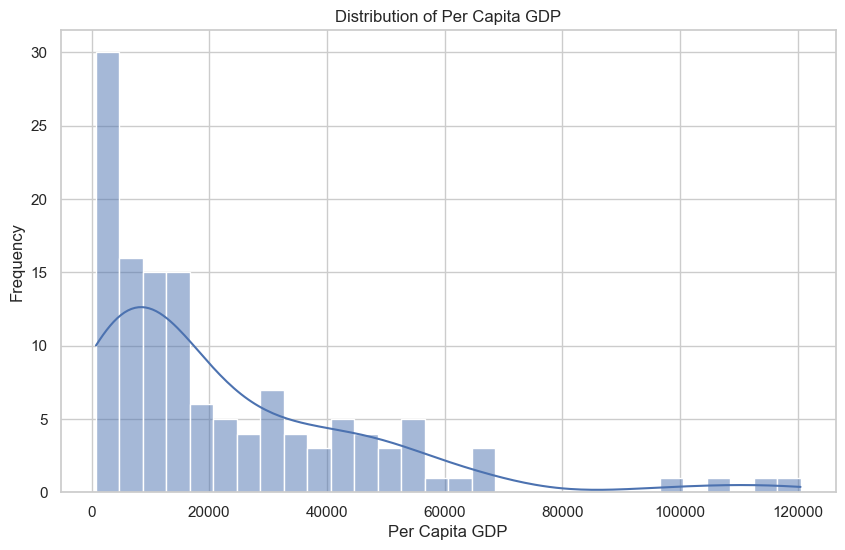

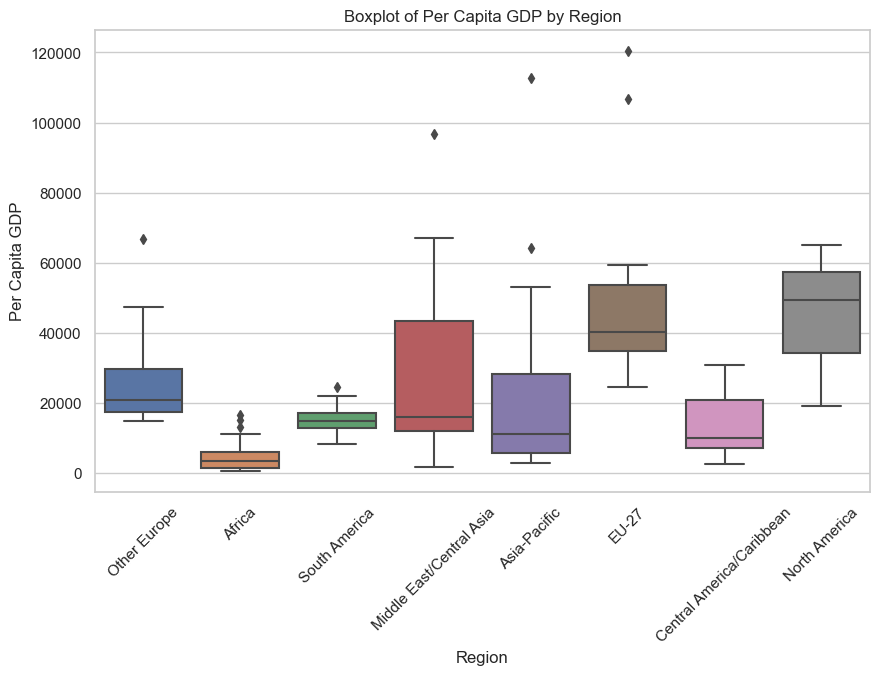

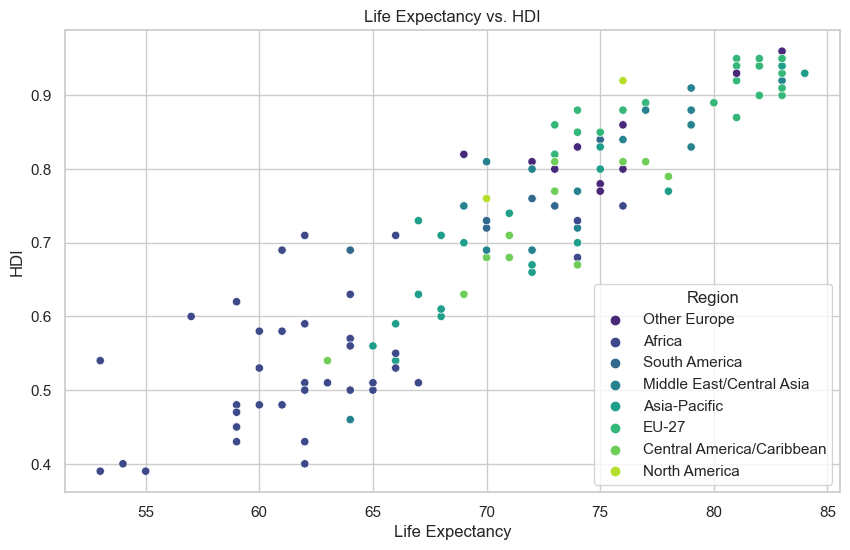

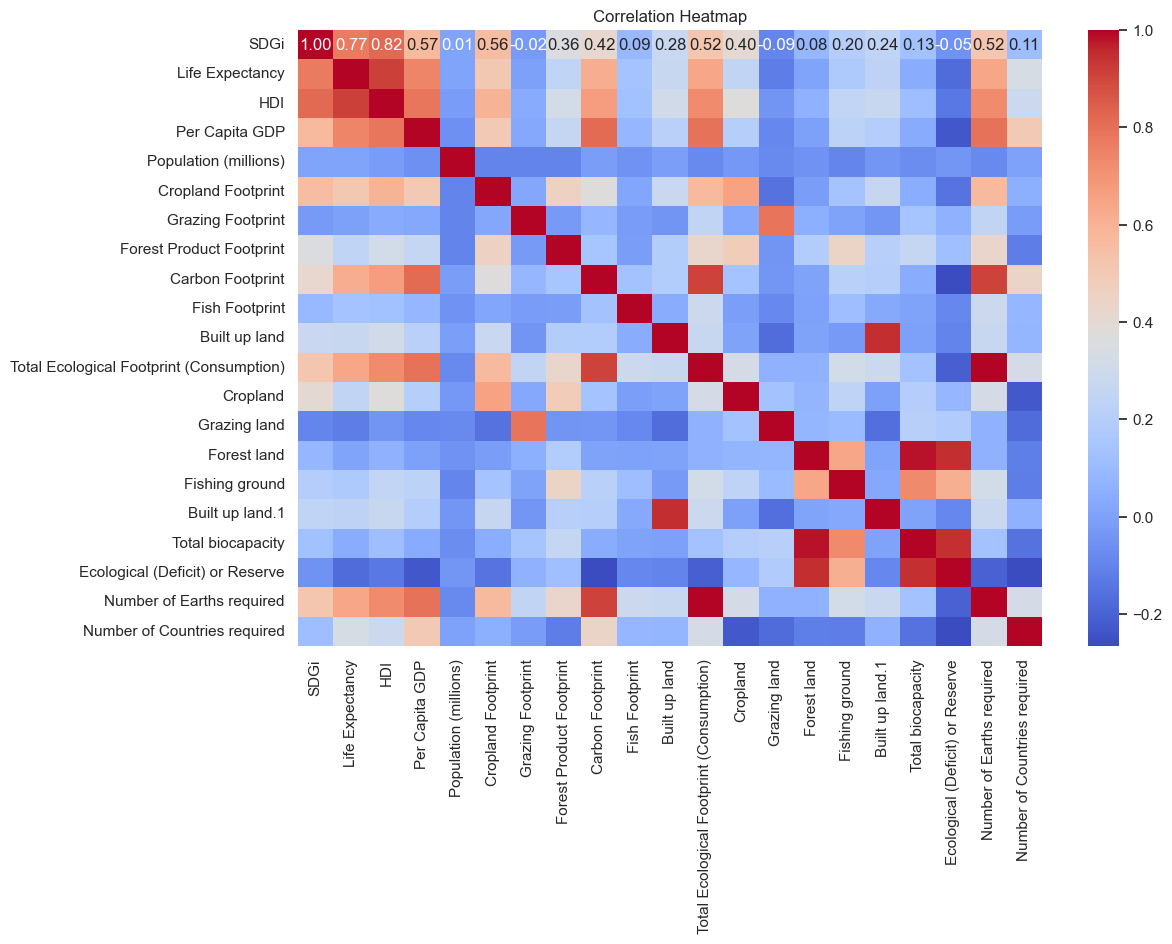

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define a list of potential encodings to try
encodings = ['ISO-8859-1', 'cp1252', 'utf-16', 'utf-8-sig']

# Try reading the CSV with different encodings
df = None
for encoding in encodings:
    try:
        df = pd.read_csv('Resources/Global Ecological Footprint 2023.csv', encoding=encoding)
        print(f"File successfully read with encoding: {encoding}")
        break
    except UnicodeDecodeError as e:
        print(f"Failed to read with encoding {encoding}: {e}")

# If no suitable encoding is found, raise an error
if df is None:
    raise ValueError("None of the specified encodings could read the file.")

# Rename columns if needed
df.rename(columns={'Total biocapacity ': 'Total biocapacity', 'Life Exectancy': 'Life Expectancy'}, inplace=True)

# Convert columns to numeric with error handling
columns_to_convert = ['SDGi', 'Life Expectancy', 'HDI', 'Population (millions)', 'Per Capita GDP']
for col in columns_to_convert:
    if col in df.columns:
        # Convert to string if necessary
        if df[col].dtype != 'object':
            df[col] = df[col].astype(str)
        
        # Remove '$' and ',' before conversion
        df[col] = df[col].str.replace('$', '', regex=False).str.replace(',', '', regex=False)
        
        # Convert to numeric, catching errors and printing them
        try:
            df[col] = pd.to_numeric(df[col], errors='coerce')
        except ValueError as e:
            print(f"ValueError for column {col}: {e}")

# Check for non-numeric values in columns that should be numeric
for col in columns_to_convert:
    if col in df.columns:
        non_numeric = df[~df[col].apply(pd.to_numeric, errors='coerce').notna()]
        if not non_numeric.empty:
            print(f"Non-numeric values in column {col}:")
            print(non_numeric[[col]].head())

# Drop rows with missing values
df_cleaned = df.dropna()

# Strip leading and trailing spaces from column names
df_cleaned.columns = df_cleaned.columns.str.strip()

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Distribution of a numerical column
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Per Capita GDP'].dropna(), kde=True, bins=30)
plt.title('Distribution of Per Capita GDP')
plt.xlabel('Per Capita GDP')
plt.ylabel('Frequency')
plt.show()

# Boxplot of a numerical column
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Per Capita GDP', data=df_cleaned)
plt.title('Boxplot of Per Capita GDP by Region')
plt.xlabel('Region')
plt.ylabel('Per Capita GDP')
plt.xticks(rotation=45)
plt.show()

# Scatter plot between two numerical columns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Life Expectancy', y='HDI', data=df_cleaned, hue='Region', palette='viridis')
plt.title('Life Expectancy vs. HDI')
plt.xlabel('Life Expectancy')
plt.ylabel('HDI')
plt.legend(title='Region')
plt.show()

# Select only numeric columns for the correlation matrix
numeric_cols = df_cleaned.select_dtypes(include=[float, int]).columns

# Heatmap of correlations
plt.figure(figsize=(12, 8))
correlation_matrix = df_cleaned[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [119]:
import pandas as pd
from sqlalchemy import create_engine

# Load the CSV file into a DataFrame
file_path = 'Resources/clean_data.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')  # Adjust encoding if needed

# Display the DataFrame to ensure it loaded correctly
print(df.head())

# Rename columns if needed
df.rename(columns={'Total biocapacity ': 'Total biocapacity', 'Life Exectancy': 'Life Expectancy'}, inplace=True)

# Convert columns to numeric, forcing errors to NaN
columns_to_convert = ['SDGi', 'Life Expectancy', 'HDI', 'Population (millions)', 'Per Capita GDP']
for col in columns_to_convert:
    if col in df.columns:
        # Convert column to numeric, replace non-numeric values with NaN
        df[col] = pd.to_numeric(df[col].str.replace('$', '', regex=False).str.replace(',', '', regex=False), errors='coerce')

# Remove rows where any of the critical columns have NaN values
df_cleaned = df.dropna(subset=columns_to_convert)

# Create an SQLite database and store the DataFrame
engine = create_engine('sqlite:///Global_Ecological_Footprint.db', echo=True)
df_cleaned.to_sql('ecological_footprint', con=engine, if_exists='replace', index=False)

print("Data has been inserted into the SQLite database successfully.")


   Unnamed: 0              Country                     Region  SDGi  \
0           0          Afghanistan   Middle East/Central Asia  52.5   
1           1              Albania               Other Europe  71.6   
2           2              Algeria                     Africa  71.5   
3           3               Angola                     Africa  50.9   
4           4  Antigua and Barbuda  Central America/Caribbean   NaN   

  Life Exectancy   HDI Per Capita GDP Income Group Population (millions)  \
0             62  0.48            NaN           LI                  40.8   
1             76   0.8       $14,889            UM                   2.9   
2             76  0.75       $11,137            UM                  45.4   
3             62  0.59        $6,304            LM                    35   
4             78  0.79       $18,749            HI                   0.1   

   Cropland Footprint  ...  Built up land  \
0                 0.4  ...       0.028232   
1                 0.8  ...

In [34]:
import pandas as pd
import sqlite3

# Path to the CSV file
csv_path = 'Resources/clean_data.csv'

# Path to the SQLite database file
db_path = '/Users/cmatthews/Desktop/Data-Analyst/Projects/Ecological-Footprint-Analysis/Global_Ecological_Footprint.db'

# Load the CSV file into a pandas DataFrame
csv_data = pd.read_csv(csv_path)

# Define the new table name
new_table_name = 'ecological_footprint_by_country'

# Connect to the SQLite database
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# Create the new table
cursor.execute(f"""
CREATE TABLE IF NOT EXISTS {new_table_name} (
    Country TEXT,
    Ecological_Footprint REAL
);
""")

# Insert the data from the CSV file into the new table
csv_data.to_sql(new_table_name, conn, if_exists='replace', index=False)

# Commit the changes and close the connection
conn.commit()

# Verify that the data has been inserted correctly by retrieving the first few rows
cursor.execute(f"SELECT * FROM {new_table_name} LIMIT 5;")
new_table_sample_data = cursor.fetchall()

# Close the connection
conn.close()

# Display the first few rows of the new table
print(new_table_sample_data)


[(0, 'Afghanistan', 'Middle East/Central Asia', '52.5', '62', '0.48', None, 'LI', '40.8', 0.4, 0.1, 0.1, 0.2, 0.0, 0.028232273, 0.8, 0.3, 0.1, 0.012981282, 0.000565167, 0.513827024, -0.287637599, 0.530695582, 1.559794611), (1, 'Albania', 'Other Europe', '71.6', '76', '0.8', '$14,889 ', 'UM', '2.9', 0.8, 0.2, 0.2, 0.7, 0.0, 0.073005587, 2.1, 0.6, 0.2, 0.223326157, 0.081391904, 1.176752316, -0.894486045, 1.37148542, 1.760131111), (2, 'Algeria', 'Africa', '71.5', '76', '0.75', '$11,137 ', 'UM', '45.4', 0.7, 0.2, 0.1, 1.2, 0.0, 0.037775208, 2.2, 0.4, 0.2, 0.023911707, 0.007179154, 0.663374969, -1.559593496, 1.471954604, 3.350998407), (3, 'Angola', 'Africa', '50.9', '62', '0.59', '$6,304 ', 'LM', '35', 0.2, 0.1, 0.1, 0.3, 0.1, 0.061359798, 0.9, 0.2, 0.8, 0.416887822, 0.153498781, 1.588191242, 0.730345635, 0.568028656, 0.540139993), (4, 'Antigua and Barbuda', 'Central America/Caribbean', None, '78', '0.79', '$18,749 ', 'HI', '0.1', None, None, None, None, None, None, 2.9, None, None, None, N

In [35]:
import sqlite3
from graphviz import Digraph

# Path to the SQLite database file
db_path = '/Users/cmatthews/Desktop/Data-Analyst/Projects/Ecological-Footprint-Analysis/Global_Ecological_Footprint.db'

# Connect to the SQLite database
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# Retrieve the list of tables
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

# Create a Digraph object
dot = Digraph()

# Add tables and their columns to the Digraph
for table_name in tables:
    table_name = table_name[0]
    dot.node(table_name, table_name)
    
    # Retrieve the columns of the table
    cursor.execute(f"PRAGMA table_info({table_name});")
    columns = cursor.fetchall()
    
    for column in columns:
        column_name = column[1]
        dot.node(f"{table_name}.{column_name}", f"{table_name}.{column_name}")
        dot.edge(table_name, f"{table_name}.{column_name}")

# You can add relationships between tables manually if you have that information
# Example:
# dot.edge('table1.column', 'table2.column')

# Close the connection
conn.close()

# Render and save the ERD diagram
dot.render('erd_diagram', format='png', view=True)


'erd_diagram.png'

In [136]:
import sqlite3
from graphviz import Digraph

# Path to the SQLite database file
db_path = '/Users/cmatthews/Desktop/Data-Analyst/Projects/Ecological-Footprint-Analysis/Global_Ecological_Footprint.db'

# Connect to the SQLite database
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# Retrieve the list of tables
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

# Create a Digraph object with increased size and resolution
dot = Digraph(graph_attr={'size': '10,10', 'dpi': '300'})

# Add tables and their columns to the Digraph
for table_name in tables:
    table_name = table_name[0]
    dot.node(table_name, table_name)
    
    # Retrieve the columns of the table
    cursor.execute(f"PRAGMA table_info({table_name});")
    columns = cursor.fetchall()
    
    for column in columns:
        column_name = column[1]
        dot.node(f"{table_name}.{column_name}", f"{table_name}.{column_name}")
        dot.edge(table_name, f"{table_name}.{column_name}")

# You can add relationships between tables manually if you have that information
# Example:
# dot.edge('table1.column', 'table2.column')

# Close the connection
conn.close()

# Render and save the ERD diagram
dot.render('erd_diagram', format='png', view=True)


'erd_diagram.png'

In [138]:
import sqlite3
from graphviz import Digraph

# Path to the SQLite database file
db_path = '/Users/cmatthews/Desktop/Data-Analyst/Projects/Ecological-Footprint-Analysis/Global_Ecological_Footprint.db'

# Connect to the SQLite database
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# Retrieve the list of tables
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

# Create a Digraph object with increased size and resolution
dot = Digraph(graph_attr={'size': '40,40!', 'dpi': '300', 'ratio': 'fill'})

# Add tables and their columns to the Digraph
for table_name in tables:
    table_name = table_name[0]
    dot.node(table_name, table_name)
    
    # Retrieve the columns of the table
    cursor.execute(f"PRAGMA table_info({table_name});")
    columns = cursor.fetchall()
    
    for column in columns:
        column_name = column[1]
        dot.node(f"{table_name}.{column_name}", f"{table_name}.{column_name}")
        dot.edge(table_name, f"{table_name}.{column_name}")

# You can add relationships between tables manually if you have that information
# Example:
# dot.edge('table1.column', 'table2.column')

# Close the connection
conn.close()

# Render and save the ERD diagram
dot.render('erd_diagram', format='png', view=True)


'erd_diagram.png'

In [38]:
import sqlite3
from graphviz import Digraph

# Path to the SQLite database file
db_path = '/Users/cmatthews/Desktop/Data-Analyst/Projects/Ecological-Footprint-Analysis/Global_Ecological_Footprint.db'

# Connect to the SQLite database
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# Retrieve the list of tables
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

# Create a Digraph object with increased size and resolution
dot = Digraph(graph_attr={'size': '40,40!', 'dpi': '300', 'ratio': 'fill'})

# Add tables and their columns to the Digraph
for table_name in tables:
    table_name = table_name[0]
    dot.node(table_name, table_name)
    
    # Retrieve the columns of the table
    cursor.execute(f"PRAGMA table_info({table_name});")
    columns = cursor.fetchall()
    
    for column in columns:
        column_name = column[1]
        dot.node(f"{table_name}.{column_name}", f"{table_name}.{column_name}")
        dot.edge(table_name, f"{table_name}.{column_name}")

    # Retrieve foreign key constraints to add relationships
    cursor.execute(f"PRAGMA foreign_key_list({table_name});")
    foreign_keys = cursor.fetchall()
    
    for fk in foreign_keys:
        from_column = fk[3]  # The column in the current table
        to_table = fk[2]     # The referenced table
        to_column = fk[4]    # The referenced column
        dot.edge(f"{table_name}.{from_column}", f"{to_table}.{to_column}")

# Close the connection
conn.close()

# Render and save the ERD diagram
dot.render('erd_diagram_with_relationships', format='png', view=True)


'erd_diagram_with_relationships.png'

In [140]:
import sqlite3
from graphviz import Digraph

# Path to the SQLite database file
db_path = '/Users/cmatthews/Desktop/Data-Analyst/Projects/Ecological-Footprint-Analysis/Global_Ecological_Footprint.db'

# Connect to the SQLite database
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# Retrieve the list of tables
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

# Create a Digraph object with increased size and resolution
dot = Digraph(graph_attr={'size': '40,40!', 'dpi': '300', 'ratio': 'fill'})

# Add tables and their columns to the Digraph
for table_name in tables:
    table_name = table_name[0]
    dot.node(table_name, table_name)
    
    # Retrieve the columns of the table
    cursor.execute(f"PRAGMA table_info({table_name});")
    columns = cursor.fetchall()
    
    for column in columns:
        column_name = column[1]
        dot.node(f"{table_name}.{column_name}", f"{table_name}.{column_name}")
        dot.edge(table_name, f"{table_name}.{column_name}")

    # Retrieve foreign key constraints to add relationships
    cursor.execute(f"PRAGMA foreign_key_list({table_name});")
    foreign_keys = cursor.fetchall()
    
    for fk in foreign_keys:
        from_column = fk[3]  # The column in the current table
        to_table = fk[2]     # The referenced table
        to_column = fk[4]    # The referenced column
        dot.edge(f"{table_name}.{from_column}", f"{to_table}.{to_column}")

# Close the connection
conn.close()

# Render and save the ERD diagram as an SVG file
dot.render('erd_diagram_with_relationships', format='svg', view=True)


'erd_diagram_with_relationships.svg'

In [141]:
import sqlite3
from graphviz import Digraph

# Path to the SQLite database file
db_path = '/Users/cmatthews/Desktop/Data-Analyst/Projects/Ecological-Footprint-Analysis/Global_Ecological_Footprint.db'

# Connect to the SQLite database
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# Retrieve the list of tables
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

# Create a Digraph object with increased size and resolution
dot = Digraph(graph_attr={'size': '40,40!', 'dpi': '300', 'ratio': 'fill'})

# Add tables and their columns to the Digraph
for table_name in tables:
    table_name = table_name[0]
    dot.node(table_name, table_name)
    
    # Retrieve the columns of the table
    cursor.execute(f"PRAGMA table_info({table_name});")
    columns = cursor.fetchall()
    
    for column in columns:
        column_name = column[1]
        dot.node(f"{table_name}.{column_name}", f"{table_name}.{column_name}")
        dot.edge(table_name, f"{table_name}.{column_name}")

    # Retrieve foreign key constraints to add relationships
    cursor.execute(f"PRAGMA foreign_key_list({table_name});")
    foreign_keys = cursor.fetchall()
    
    for fk in foreign_keys:
        from_column = fk[3]  # The column in the current table
        to_table = fk[2]     # The referenced table
        to_column = fk[4]    # The referenced column
        dot.edge(f"{table_name}.{from_column}", f"{to_table}.{to_column}")

# Close the connection
conn.close()

# Render and save the ERD diagram as an SVG file
dot.render('erd_diagram_with_relationships', format='svg', view=True)


'erd_diagram_with_relationships.svg'

In [142]:
import sqlite3
from graphviz import Digraph

# Path to the SQLite database file
db_path = '/Users/cmatthews/Desktop/Data-Analyst/Projects/Ecological-Footprint-Analysis/Global_Ecological_Footprint.db'

# Connect to the SQLite database
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# Retrieve the list of tables
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

# Create a Digraph object with settings for a more compact layout
dot = Digraph(graph_attr={'dpi': '150', 'ratio': 'compress', 'splines': 'true', 'overlap': 'false'})
dot.attr(rankdir='TB', ranksep='1', nodesep='0.5')

# Add tables and their columns to the Digraph
for table in tables:
    table_name = table[0]
    with dot.subgraph(name='cluster_' + table_name) as c:
        c.attr(label=table_name, shape='box', style='filled', color='lightgrey')
        c.node(table_name, shape='box', style='filled', color='lightgrey')
        
        # Retrieve the columns of the table
        cursor.execute(f"PRAGMA table_info({table_name});")
        columns = cursor.fetchall()
        
        for column in columns:
            column_name = column[1]
            c.node(f"{table_name}.{column_name}", label=column_name, shape='ellipse')
            c.edge(table_name, f"{table_name}.{column_name}")

# Add relationships based on foreign key constraints
for table in tables:
    table_name = table[0]
    cursor.execute(f"PRAGMA foreign_key_list({table_name});")
    foreign_keys = cursor.fetchall()
    
    for fk in foreign_keys:
        from_column = fk[3]  # The column in the current table
        to_table = fk[2]     # The referenced table
        to_column = fk[4]    # The referenced column
        dot.edge(f"{table_name}.{from_column}", f"{to_table}.{to_column}", label="fk")

# Set a fixed size
dot.attr(size='10,10!')

# Close the connection
conn.close()

# Render and save the ERD diagram as an SVG file
dot.render('/Users/cmatthews/Desktop/Data-Analyst/Projects/Ecological-Footprint-Analysis/erd_diagram_with_relationships', format='svg', view=True)


'/Users/cmatthews/Desktop/Data-Analyst/Projects/Ecological-Footprint-Analysis/erd_diagram_with_relationships.svg'

In [143]:
import sqlite3
from graphviz import Digraph

# Path to the SQLite database file
db_path = '/Users/cmatthews/Desktop/Data-Analyst/Projects/Ecological-Footprint-Analysis/Global_Ecological_Footprint.db'

# Connect to the SQLite database
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# Retrieve the list of tables
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

# Create a Digraph object with settings for a more compact layout
dot = Digraph(graph_attr={'dpi': '150', 'ratio': 'compress', 'splines': 'true', 'overlap': 'scale', 'concentrate': 'true'})
dot.attr(rankdir='TB', ranksep='1', nodesep='0.5')

# Add tables and their columns to the Digraph
for table in tables:
    table_name = table[0]
    with dot.subgraph(name='cluster_' + table_name) as c:
        c.attr(label=table_name, shape='box', style='filled', color='lightgrey')
        c.node(table_name, shape='box', style='filled', color='lightgrey')
        
        # Retrieve the columns of the table
        cursor.execute(f"PRAGMA table_info({table_name});")
        columns = cursor.fetchall()
        
        for column in columns:
            column_name = column[1]
            c.node(f"{table_name}.{column_name}", label=column_name, shape='ellipse')
            c.edge(table_name, f"{table_name}.{column_name}")

# Add relationships based on foreign key constraints
for table in tables:
    table_name = table[0]
    cursor.execute(f"PRAGMA foreign_key_list({table_name});")
    foreign_keys = cursor.fetchall()
    
    for fk in foreign_keys:
        from_column = fk[3]  # The column in the current table
        to_table = fk[2]     # The referenced table
        to_column = fk[4]    # The referenced column
        dot.edge(f"{table_name}.{from_column}", f"{to_table}.{to_column}", label="fk")

# Close the connection
conn.close()

# Render and save the ERD diagram as an SVG file
dot.render('/Users/cmatthews/Desktop/Data-Analyst/Projects/Ecological-Footprint-Analysis/erd_diagram_with_relationships', format='svg', view=True)


'/Users/cmatthews/Desktop/Data-Analyst/Projects/Ecological-Footprint-Analysis/erd_diagram_with_relationships.svg'

In [145]:
import sqlite3
from graphviz import Digraph

# Path to the SQLite database file
db_path = '/Users/cmatthews/Desktop/Data-Analyst/Projects/Ecological-Footprint-Analysis/Global_Ecological_Footprint.db'

# Connect to the SQLite database
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# Retrieve the list of tables
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

# Check if any tables were found
if not tables:
    print("No tables found in the database.")
    conn.close()
    exit()

# Print the list of tables for debugging
print("Tables found:", tables)

# Create a Digraph object
dot = Digraph()

# Add tables and their columns to the Digraph
for table in tables:
    table_name = table[0]
    dot.node(table_name, shape='box')
    print(f"Adding table: {table_name}")  # Debugging
    
    # Retrieve the columns of the table
    cursor.execute(f"PRAGMA table_info({table_name});")
    columns = cursor.fetchall()
    print(f"Columns in table {table_name}:", columns)  # Debugging
    
    for column in columns:
        column_name = column[1]
        dot.node(f"{table_name}.{column_name}", label=column_name, shape='ellipse')
        dot.edge(table_name, f"{table_name}.{column_name}")

# Add relationships based on foreign key constraints
for table in tables:
    table_name = table[0]
    cursor.execute(f"PRAGMA foreign_key_list({table_name});")
    foreign_keys = cursor.fetchall()
    print(f"Foreign keys in table {table_name}:", foreign_keys)  # Debugging
    
    for fk in foreign_keys:
        from_column = fk[3]  # The column in the current table
        to_table = fk[2]     # The referenced table
        to_column = fk[4]    # The referenced column
        dot.edge(f"{table_name}.{from_column}", f"{to_table}.{to_column}", label="fk")

# Close the connection
conn.close()

# Render and save the ERD diagram as an SVG file
output_path = '/Users/cmatthews/Desktop/Data-Analyst/Projects/Ecological-Footprint-Analysis/erd_diagram_with_relationships'
print(f"Rendering diagram to {output_path}.svg")  # Debugging
dot.render(output_path, format='svg', view=True)


Tables found: [('ecological_footprint',), ('ecological_footprint_by_country',)]
Adding table: ecological_footprint
Columns in table ecological_footprint: [(0, 'Unnamed: 0', 'BIGINT', 0, None, 0), (1, 'Country', 'TEXT', 0, None, 0), (2, 'Region', 'TEXT', 0, None, 0), (3, 'SDGi', 'FLOAT', 0, None, 0), (4, 'Life Expectancy', 'FLOAT', 0, None, 0), (5, 'HDI', 'FLOAT', 0, None, 0), (6, 'Per Capita GDP', 'FLOAT', 0, None, 0), (7, 'Income Group', 'TEXT', 0, None, 0), (8, 'Population (millions)', 'FLOAT', 0, None, 0), (9, 'Cropland Footprint', 'FLOAT', 0, None, 0), (10, 'Grazing Footprint', 'FLOAT', 0, None, 0), (11, 'Forest Product Footprint', 'FLOAT', 0, None, 0), (12, 'Carbon Footprint', 'FLOAT', 0, None, 0), (13, 'Fish Footprint', 'FLOAT', 0, None, 0), (14, 'Built up land', 'FLOAT', 0, None, 0), (15, 'Total Ecological Footprint (Consumption)', 'FLOAT', 0, None, 0), (16, 'Cropland', 'FLOAT', 0, None, 0), (17, 'Grazing land', 'FLOAT', 0, None, 0), (18, 'Forest land', 'FLOAT', 0, None, 0), (19

'/Users/cmatthews/Desktop/Data-Analyst/Projects/Ecological-Footprint-Analysis/erd_diagram_with_relationships.svg'

In [146]:
import sqlite3
from graphviz import Digraph

# Path to the SQLite database file
db_path = '/Users/cmatthews/Desktop/Data-Analyst/Projects/Ecological-Footprint-Analysis/Global_Ecological_Footprint.db'

# Connect to the SQLite database
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# Retrieve the list of tables
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

# Check if any tables were found
if not tables:
    print("No tables found in the database.")
    conn.close()
    exit()

# Print the list of tables for debugging
print("Tables found:", tables)

# Create a Digraph object
dot = Digraph()

# Add tables and their columns to the Digraph
for table in tables:
    table_name = table[0]
    dot.node(table_name, shape='box')
    print(f"Adding table: {table_name}")  # Debugging
    
    # Retrieve the columns of the table
    cursor.execute(f"PRAGMA table_info({table_name});")
    columns = cursor.fetchall()
    print(f"Columns in table {table_name}:", columns)  # Debugging
    
    for column in columns:
        column_name = column[1]
        dot.node(f"{table_name}.{column_name}", label=column_name, shape='ellipse')
        dot.edge(table_name, f"{table_name}.{column_name}")

# Add relationships based on foreign key constraints
for table in tables:
    table_name = table[0]
    cursor.execute(f"PRAGMA foreign_key_list({table_name});")
    foreign_keys = cursor.fetchall()
    print(f"Foreign keys in table {table_name}:", foreign_keys)  # Debugging
    
    for fk in foreign_keys:
        from_column = fk[3]  # The column in the current table
        to_table = fk[2]     # The referenced table
        to_column = fk[4]    # The referenced column
        dot.edge(f"{table_name}.{from_column}", f"{to_table}.{to_column}", label="fk")

# Close the connection
conn.close()

# Render and save the ERD diagram as an SVG file
output_path = '/Users/cmatthews/Desktop/Data-Analyst/Projects/Ecological-Footprint-Analysis/erd_diagram_with_relationships'
print(f"Rendering diagram to {output_path}.svg")  # Debugging
dot.render(output_path, format='svg', view=True)


Tables found: [('ecological_footprint',), ('ecological_footprint_by_country',)]
Adding table: ecological_footprint
Columns in table ecological_footprint: [(0, 'Unnamed: 0', 'BIGINT', 0, None, 0), (1, 'Country', 'TEXT', 0, None, 0), (2, 'Region', 'TEXT', 0, None, 0), (3, 'SDGi', 'FLOAT', 0, None, 0), (4, 'Life Expectancy', 'FLOAT', 0, None, 0), (5, 'HDI', 'FLOAT', 0, None, 0), (6, 'Per Capita GDP', 'FLOAT', 0, None, 0), (7, 'Income Group', 'TEXT', 0, None, 0), (8, 'Population (millions)', 'FLOAT', 0, None, 0), (9, 'Cropland Footprint', 'FLOAT', 0, None, 0), (10, 'Grazing Footprint', 'FLOAT', 0, None, 0), (11, 'Forest Product Footprint', 'FLOAT', 0, None, 0), (12, 'Carbon Footprint', 'FLOAT', 0, None, 0), (13, 'Fish Footprint', 'FLOAT', 0, None, 0), (14, 'Built up land', 'FLOAT', 0, None, 0), (15, 'Total Ecological Footprint (Consumption)', 'FLOAT', 0, None, 0), (16, 'Cropland', 'FLOAT', 0, None, 0), (17, 'Grazing land', 'FLOAT', 0, None, 0), (18, 'Forest land', 'FLOAT', 0, None, 0), (19

'/Users/cmatthews/Desktop/Data-Analyst/Projects/Ecological-Footprint-Analysis/erd_diagram_with_relationships.svg'